In [5]:
import urllib.request 
req = urllib.request.Request("https://preview.colorlib.com/#miniblog")
response = urllib.request.urlopen(req)
response

HTTPError: HTTP Error 403: Forbidden

In [10]:
content = response.read()
charset = response.headers.get_content_charset()
html = content.decode(charset)
print(html) 

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en-SG"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="5lWnDh8wI+jKsF60KJpgxg==">(function(){window.google={kEI:'gy-yYK6VHsyF4t4P9uCPeA',kEXPI:'0,772215,1,6543,523777,56873,954,5104,207,4804,2316,383,246,5,1354,5251,6384,9847,10,1106274,1233,1196550,500,43,328941,51223,16115,6057,22627,17572,4859,1361,283,9008,3024,4743,12841,4020,978,13228,2054,1793,4192,6430,7432,7095,4517,2778,919,2370,4304,1279,1042,1170,530,149,1103,840,517,1679,4101,108,4012,2023,1777,520,6345,8325,3227,2845,7,12354,5096,1475,6401,4929,108,3407,908,2,3555,2397,7468,3277,3,576,1014,1,820,4625,148,5990,5333,2652,4,1528,2304,1236,5803,1791,266,2627,2014,4067,9544,4764,2658,4164,78,520,911,1683,31,5616,5796,2216,2305,638,1494,5586,3772,3494,3269,665,2145,3661,2551,2046,2048,20,3118,6,908,3

In [23]:
from datetime import date 
birthday = date(2004, 11, 5)
birthday.isoformat() ## iso 8601 format: YYYY-MM-DD
birthday.weekday() # Monday = 0 .... 
birthday.isoweekday() # Monday = 1, .... 
birthday.ctime()  # C-standard time output

'Fri Nov  5 00:00:00 2004'

In [24]:
from datetime import time 
lunchtime = time(hour = 13, minute = 30)
lunchtime

datetime.time(13, 30)

In [25]:
# date time formating 
birthday.strftime('%A, %d %B %Y') # for date

'Friday, 05 November 2004'

## Numpy load text

In [13]:
import numpy as np 

my_array  = np.arange(1,1000,0.2)

np.save('my-array.npy',my_array)
a = np.load('my-array.npy')
a

array([  1. ,   1.2,   1.4, ..., 999.4, 999.6, 999.8])

In [17]:
np.savetxt("my-array.txt",my_array, delimiter = ' ', newline = '\n',header = '', footer = '')
np.genfromtxt("my-array.txt", skip_header = 1, delimiter = ' ')

array([  1.2,   1.4,   1.6, ..., 999.4, 999.6, 999.8])

In [33]:
### Statictics Method 
a = np.linspace(0,2,10)
print(np.sqrt(a))
print(np.argmin(a))
print(np.min(a))
np.fmin([1,2,3,4],[2,1,5,3]) # compare arrays

[0.         0.47140452 0.66666667 0.81649658 0.94280904 1.05409255
 1.15470054 1.24721913 1.33333333 1.41421356]
0
0.0


array([1, 1, 3, 3])

In [40]:
print(np.percentile(a, 50))
print(np.mean(a))
print(np.std(a)) # standard deviation 
print(np.nanstd(a)) # ignore the nan values
print(np.cov(a))

1.0
1.0
0.6382847385042253
0.6382847385042253
0.4526748971193415


[1 1 3 3 2] [23.  35.8 48.6 61.4 74.2 87. ]
[0. 1. 3. 5. 1.] [  0.  20.  40.  60.  80. 100.] <BarContainer object of 5 artists>


[]

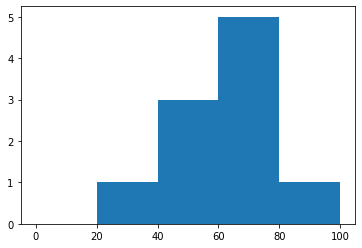

In [44]:
## histogram bins 
marks = np.array([45,68,56,23,60,87,75,59,63,72])
bins = [20,40,60,80,100]
hist, bins = np.histogram(marks, bins = 5)
# hist return the space bins 
# bins return the edges of each bins
print(hist, bins)

import matplotlib.pyplot as plt 
hist, bins, pathces = plt.hist(marks, bins = 5, range= (0,100))
print(hist, bins,pathces) 
plt.plot()

## numpy polynomial

In [50]:
from numpy.polynomial import Polynomial
import numpy as np 

p = np.polynomial.Polynomial([6,-5,1]) # 6-5x +x^2
print(p)
print(p.coef)
print(p(4)) # when x = 4

6.0 - 5.0·x¹ + 1.0·x²
[ 6. -5.  1.]
2.0


In [62]:
## polynomial algebra
q = Polynomial([2,-3])
print(p+q)
print(p-q)
print(p // q)
print(p % q) 
# p = q(p//q) + p%q

8.0 - 8.0·x¹ + 1.0·x²
4.0 - 2.0·x¹ + 1.0·x²
1.4444444444444444 - 0.3333333333333333·x¹
3.1111111111111116


In [56]:
quotient, remainder = divmod(p,q)
print(quotient)
print(remainder)
print(p(q))

1.4444444444444444 - 0.3333333333333333·x¹
3.1111111111111116
0.0 + 3.0·x¹ + 9.0·x²


In [59]:
# root-finding 
print(p.roots())
print((q*q.roots()))
print(Polynomial([5,4,1]).roots())

[2. 3.]
1.3333333333333333 - 2.0·x¹
[-2.-1.j -2.+1.j]


In [68]:
# calculus
print(p)
print(p.deriv())
print(p.deriv(2))
print(q)
print(q.integ(lbnd = 2, k = 5)) # k is integrating constant lbnd is lower boundary (default 0)

6.0 - 5.0·x¹ + 1.0·x²
-5.0 + 2.0·x¹
2.0
2.0 - 3.0·x¹
7.0 + 2.0·x¹ - 1.5·x²


In [72]:
# Fitting Polynomials 
x = np.linspace(100,100.1, 1001)
f = lambda x : np.exp(-np.sin(40*x))
p = Polynomial.fit(x, f(x), 4) # return the minimum sum of the squared errors
print(p)
print(p.domain) # x domain
print(p.window) 
chi, mu = p.mapparms()
print(chi, mu)

1.4942255113759981 - 2.546414491999938·x¹ + 0.6328464062262301·x² +
1.8424646262661926·x³ - 1.0282195623863506·x⁴
[100.  100.1]
[-1.  1.]
-2001.0000000001137 20.000000000001137


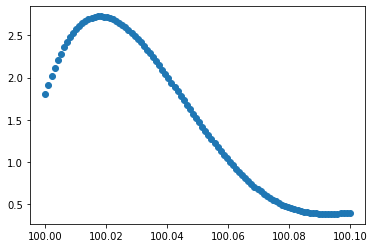

In [85]:
a = p.linspace(100)
plt.scatter(a[0],a[1])

## Matrix

In [90]:
A = np.array([[1,2],[-1,2]])
B = np.array([[2,3],[4,-5]])
print(A)
print(A.transpose())
print(A*B) # multiple element wise
print(A.dot(B)) # matrix product

[[ 1  2]
 [-1  2]]
[[ 1 -1]
 [ 2  2]]
[[  2   6]
 [ -4 -10]]
[[ 10  -7]
 [  6 -13]]


In [95]:
# norm
print(np.linalg.norm(A))
# determinant 
print(np.linalg.det(A))
# trace 
print(np.trace(A))
# rank of matrix 
print(np.linalg.matrix_rank(A))
# inversion 
print(np.linalg.inv(A))
# eigen values and vectors 
vals, vecs = np.linalg.eig(A)
print(vals)
print(vecs)

3.1622776601683795
4.0
3
2
[[ 0.5  -0.5 ]
 [ 0.25  0.25]]
[1.5+1.32287566j 1.5-1.32287566j]
[[0.81649658+0.j         0.81649658-0.j        ]
 [0.20412415+0.54006172j 0.20412415-0.54006172j]]


In [17]:
import numpy as np
# Solve Scaler Equations
A = np.array([[3,-2,0], [-2,1,-3], [4,6,1]])
b = np.array([8,-20,7])
np.linalg.solve(M,b)

NameError: name 'M' is not defined

rms residual = [9.3786813e-05]


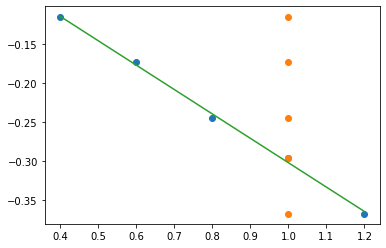

In [18]:
# solve by least square method 
c = np.linspace(0.4,1.2,5)
A = np.vstack((c, np.ones(len(c)))).T
T = np.log(np.array([0.891,0.841,0.783,0.744,0.692]))
x, resid, _, _ = np.linalg.lstsq(A,T, rcond = None)
m, k = x 
print(f'rms residual = {resid}')

import matplotlib.pyplot as plt 
plt.plot(A, T, 'o')
plt.plot(c, m*c + k)

## Numpy Random Module

In [19]:
np.random.seed(42)
print(np.random.randint(1,10,10)) # 10 random integer in [1,10)
print(np.random.random_sample((3,2)))
print(np.random.rand(2,3))

[7 4 8 5 7 3 7 8 5 4]
[[1.42866818e-01 6.50888473e-01]
 [5.64115790e-02 7.21998772e-01]
 [9.38552709e-01 7.78765841e-04]]
[[0.99221156 0.61748151 0.61165316]
 [0.00706631 0.02306243 0.52477466]]


In [20]:
# normal distribudtion
print(np.random.normal())
print(np.random.rand(2,2))

-0.5318174102182277
[[0.97375552 0.23277134]
 [0.09060643 0.61838601]]


In [49]:
# binomial distribution
# number of particular outcomes in a sequence of n Bernoulli trials - that is, n independent experiments, each of which can yield exactly two possible outcomes
np.random.binomial(4,0.5, (4,4)) # argument (n,p)

array([[3, 3, 4, 4],
       [4, 4, 2, 3],
       [4, 4, 3, 4],
       [4, 3, 4, 3]])

In [54]:
# Poisson Distribution
# Probability of a particular number of independent events occuring in a given interval of time if these events occur at a known avg rate
np.random.poisson(lam = 2.5, size = 8) # if I receive an average 2.5 emails in 1st sample, the number of emails in subsequent next 8 sample is

array([2, 2, 5, 2, 1, 5, 0, 4])

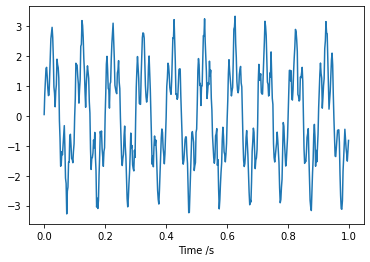

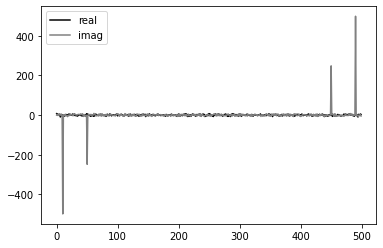

In [106]:
# Fourier Transform (One-dimensional fourier transform)
A1, A2 = 2, 1 
freq1, freq2 = 10, 50 
fsamp = 500 
t = np.arange(0, 1, 1/fsamp)
n = len(t)
f = A1*np.sin(2*np.pi*freq1*t) + A2*np.sin(2*np.pi*freq2*t)
f += 0.2 * np.random.randn(n)
plt.plot(t,f)
plt.xlabel("Time /s")
plt.show()

F = np.fft.fft(f)
plt.plot(F.real, 'k', label = 'real')
plt.plot(F.imag, 'gray', label = 'imag')
plt.legend(loc = 2)
plt.show()

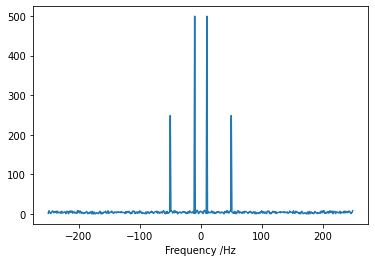

In [107]:
freq = np.fft.fftfreq(500, 1/fsamp)
F_shifted = np.fft.fftshift(F)
freq_shifted = np.fft.fftshift(freq)
plt.plot(freq_shifted, np.abs(F_shifted))
plt.xlabel("Frequency /Hz")
plt.show()


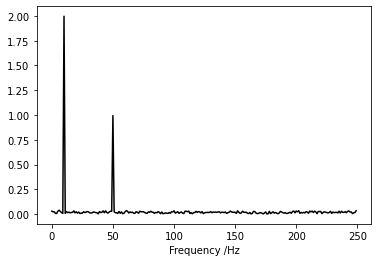

In [108]:
spec = 2/n * np.abs(F[:n//2])
plt.plot(freq[:n//2], spec, 'k')
plt.xlabel("Frequency /Hz")
plt.show()